In [1]:
import numpy as np 
import os 
cdir= os.getcwd()
print(cdir)

/Users/damon/Desktop/lensingpop


 <font size="6"> Motivation:<br />
 <font size="4"> Given a pair of GW data, can we classify whether they are gravitationally lensed. <br />
 <font size="4"> Approach: Parameter overlap <br />
 <font size="4"> But we use data-driven prior instead of parametric prior from assumption <br />
 <font size="5"> Things to be prepared: <br />
 <font size="5"> Catalog, <br />
 <font size="5"> posterior samples, <br />
 <font size="5"> different population priors, <br />
 <font size="5"> Bayes factor computation <br />

 <font size="6"> Prepare catalog: <br /> 
 <font size="5"> Mass distribution: Power-law + peak + delta peak (50,25) <br />
 <font size="5"> Redshift distribution $\propto \frac{dV_c}{dz}$ <br />
 <font size="5"> Script to generate the catalog:  <br />
 N = number of events in the intrinsic catalog 

In [2]:
N = 3000
%run -i  './Mock_Data/mock_data_generation/catalog.py' --N 3000
# pass N = 3000 for demonstration, save time

/opt/homebrew/Caskroom/miniforge/base/envs/gw-2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/Users/damon/Desktop/lensingpop
Intrinsic catalog file saved at /Users/damon/Desktop/lensingpop/Mock_Data/PowerlawplusPeakplusDelta3000Samples.npz
Calculation time: 19.78 s
Number of envets in the catalog =  3000 after selection =  (6,)
Observed catalog file saved at /Users/damon/Desktop/lensingpop/Mock_Data/PowerlawplusPeakplusDelta3000Samples_afterSelection.npz
Calculation time for pdet: 0.01 s


<font size="5"> Data in the catalog files <br />
Intrinsic catalog:

In [3]:
data = np.load('./Mock_Data/PowerlawplusPeakplusDelta3000Samples.npz')
list(data.keys())

['m1',
 'm2',
 'redshift',
 'snr',
 'inclinationValue',
 'polarisationValue',
 'rightAscensionValue',
 'declinationValue',
 'GPStimeValue']

<font size="5"> Observed catalog (after applying the selection effect):

In [4]:
data = np.load('./Mock_Data/PowerlawplusPeakplusDelta3000Samples_afterSelection.npz')
list(data.keys())

['m1',
 'm2',
 'redshift',
 'snr',
 'inclinationValue',
 'polarisationValue',
 'rightAscensionValue',
 'declinationValue',
 'GPStimeValue']

<font size="5"> Now, we have a catalog, then we generate the measurement uncertainty for each event <br />
<font size="5"> We work on detector-mass frace redshifted chirp mass, and assume the noise to be Gaussian noise: <br />
<font size="5"> $\log(\mathcal{M}_z^{\mathrm{obs}}) =  \log(\mathcal{M}_z) + \mathcal{N}(0,\sigma_\mathcal{M} / \rho_{\mathrm{obs}}), \sigma_\mathcal{M}=0.08\rho_{\mathrm{thresh}}$ <br /> 
<font size="5"> Then, we solve $m_{1,z}^{\mathrm{obs}},m_{2,z}^{\mathrm{obs}} $ from $\mathcal{M}_z^{\mathrm{obs}}$. <br /> 
<font size="5"> We know $d_{\mathrm{L}}$ is $\propto \frac{1}{\rho}$, so we generate observed luminosity distance by the following: <br /> 
$d_{\mathrm{L}}^{\mathrm{obs}} = d_{\mathrm{L}} \times \frac{\rho(m_1^\mathrm{obs},m_2^{\mathrm{obs}},z)}{\rho_(m_1,m_2,z)}$ <br /> 
<font size="5"> Script: <br /> 
N = number of events of the catalog files that you are going to read <br /> 
Npos = number of posterior samples for each event

In [5]:
%run -i './Mock_Data/mock_data_generation/gen_posterior.py' --N 3000 --Npos 1000

generating posterior...
1 -th event
2 -th event
3 -th event
4 -th event
5 -th event
6 -th event
posterior data is saved at /Users/damon/Desktop/lensingpop/Mock_Data/m1m2posterior_PPD_afterSelection3000.npz


<font size="5"> Posterior data:

In [6]:
data = np.load('./Mock_Data/m1m2posterior_PPD_afterSelection3000.npz')
list(data.keys())

['m1', 'm2', 'redshift', 'm1_posterior', 'm2_posterior', 'z_posterior']

<font size="5"> Plotting the posteriors for the first event: 

In [7]:
samples = np.array([data['m1_posterior'][0],data['m2_posterior'][0],data['z_posterior'][0]]).T
import matplotlib.pyplot as plt
import corner
import matplotlib.lines as mlines
import matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


levels = (0.50,0.90)
#d4 = x3

fig = corner.corner(samples, color='#000000',
                  hist_kwargs = {'lw':2,'density':True},hist2dlw=2,
                  plot_density=False,plot_datapoints=False,
                  fill_contours=False,levels=levels)
for ax in fig.axes:
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
fig.show()



<font size="5"> Then, we prepare the lensed catalog: <br /> 
We assume the magnification factor $p(\mu_1) \propto \mu_1^{-3}$, and $\mu_1 \sim \mu_2$\
then the we can compute the effective $d_{\mathrm{L}}$ by: <br /> 
       $d_{\mathrm{L,eff}}  = \frac{d_{\mathrm{L}}}{\mu^{(i)}}$

<font size="5"> Then we generate the measurement uncertainty by the following script:


In [8]:
%run -i '/Users/damon/Desktop/lensingpop/Mock_Data/mock_data_generation/lensing_script/lensing_posterior.py' --N 3000 --Npos 1000

load data from the observed catalog.
generating magnification factor mu for image 1/2...
calculating snr obs...
generating posterior for lensing pair...
1 -th pair
2 -th pair
3 -th pair
4 -th pair
5 -th pair
6 -th pair
20.96539616584778
The posteriors file for lensed pair is saved at /Users/damon/Desktop/lensingpop/Mock_Data/lensed_posterior3000.npz


In [9]:
data = np.load('./Mock_Data/lensed_posterior3000.npz')
list(data.keys())

['m1p1', 'm1p2', 'm2p1', 'm2p2', 'zp1', 'zp2']

<font size="5"> Plotting the posteriors for the first lensing pair: 

In [10]:
image1 = np.array([data['m1p1'][0],data['m2p1'][0],data['zp1'][0]]).T
image2 = np.array([data['m1p2'][0],data['m2p2'][0],data['zp2'][0]]).T


import corner 
import numpy as np
import matplotlib.pyplot as plt
import corner
import matplotlib.lines as mlines
import matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


levels = (0.50,0.90)
#d4 = x3

fig1 = corner.corner(image1, color='#000000',
                  hist_kwargs = {'lw':2,'density':True},hist2dlw=2,
                  plot_density=False,plot_datapoints=False,
                  fill_contours=False,levels=levels)

fig = corner.corner(image2, color='#ff7f0e',fig = fig1,
                  hist_kwargs = {'lw':2,'density':True},hist2dlw=2,
                  plot_density=False,plot_datapoints=False,
                  fill_contours=False,levels=levels)



for ax in fig.axes:
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
fig.show()




<font size="6"> Then we use DPGMM to estimate the event posteriors:

In [30]:
%run -i './Mock_Data/mock_data_generation/lensing_script/lensed_pair_dpgmm.py' --N 3000

[[12.66213857843292, 71.2128804426705], [12.66213857843292, 71.2128804426705], [0.13707737510437076, 1.089050669416368]]
0
1
2
3
4
5
dpgmm model for image1 is saved at /Users/damon/Desktop/lensingpop/Mock_Data/lensed_data/l1_ps3000.pkl
0
1
2
3
4
5
dpgmm model for image2 is saved at /Users/damon/Desktop/lensingpop/Mock_Data/lensed_data/l2_ps3000.pkl


<font size="5"> Compare the data to the samples generated from DPGMM model.

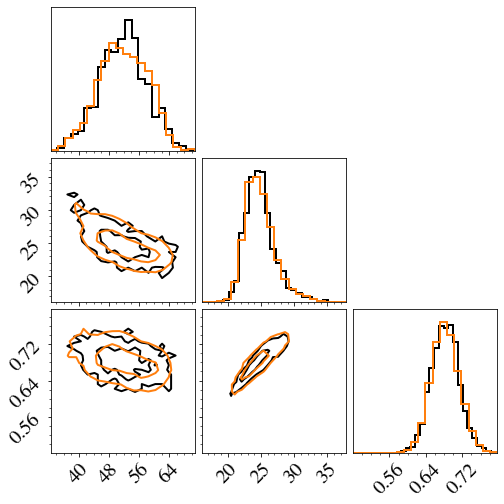

In [31]:

data = np.load('./Mock_Data/lensed_posterior3000.npz')
image1 = np.array([data['m1p1'][0],data['m2p1'][0],data['zp1'][0]]).T

import dill 

with open(cdir+'/Mock_Data/lensed_data/l1_ps{:.0f}.pkl'.format(N), 'rb') as f:
    LensedEvent1_List = dill.load(f)

import matplotlib.pyplot as plt
import corner
import matplotlib.lines as mlines
import matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


levels = (0.50,0.90)

fig1 = corner.corner(image1, color='#000000',
                  hist_kwargs = {'lw':2,'density':True},hist2dlw=2,
                  plot_density=False,plot_datapoints=False,
                  fill_contours=False,levels=levels)

fig = corner.corner(LensedEvent1_List[0].rvs(10000), color='#ff7f0e',fig = fig1,
                  hist_kwargs = {'lw':2,'density':True},hist2dlw=2,
                  plot_density=False,plot_datapoints=False,
                  fill_contours=False,levels=levels)



for ax in fig.axes:
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


<font size="5"> Population prior:

<font size="5"> Finally, we compute the BLU by the following equation,
<font size="5"> $\int \frac{p(\theta|d_1)p(\theta|d_2) p_{\mathrm{det}}(\theta)}{p(\theta)}d\theta =<\frac{p(\theta|d_1) p_{\mathrm{det}}(\theta)}{p(\theta)}>_{p(\theta|d_2)}$  
and using the script: 

In [32]:
%run -i '/Users/damon/Desktop/lensingpop/stronglensingbayesfactor/blu_dpgmm.py' --N 3000 --p_prior ppd

1 -th lensed pair calculating...
BLU =  541.8241343514503
2 -th lensed pair calculating...
BLU =  118.94896289376993
3 -th lensed pair calculating...
BLU =  2.1901158989519144e-15
4 -th lensed pair calculating...
BLU =  67.03965478597185
5 -th lensed pair calculating...
BLU =  886.98049293515
6 -th lensed pair calculating...
BLU =  10.462775184922904
BLU result is saved at /Users/damon/desktop/lensingpop/stronglensingbayesfactor/result_data/true_prior_selection.npz
